## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset and training the model

In [2]:
# Will be using the iris datset for this one
data_test = pd.read_csv('data/iris training.csv')

values = data_test.iloc[: , :-1].to_numpy()
labels = data_test['variety'].to_numpy().ravel()
#splitting the data as always
value_train, value_test, label_train, label_test = train_test_split(values, labels, test_size = 0.2, random_state =42)


knn = KNeighborsClassifier(n_neighbors = 3)#preferably less than 4


knn.fit(value_train, label_train)

label_pred = knn.predict(value_test)

### Reports

Accuracy: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



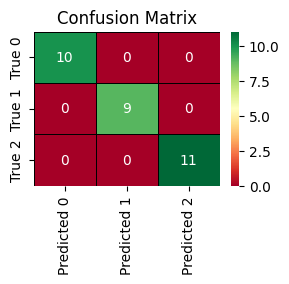

In [3]:
# The reports and confusion matrix
accuracy = accuracy_score(label_test, label_pred)
print(f'Accuracy: {accuracy*100}%')
print(classification_report(label_test, label_pred))

#making a heatmap for confusion matrix, looks better nothing else
matrix = (confusion_matrix(label_test, label_pred))
new_matrix = pd.DataFrame(matrix, index = ['True 0', 'True 1', 'True 2'], columns= ['Predicted 0', 'Predicted 1', 'Predicted 2'])
plt.figure(figsize=(3, 2))
sns.heatmap(new_matrix, annot=True, fmt="d", cmap="RdYlGn", linewidths=.5, linecolor='black')
plt.title('Confusion Matrix')
plt.show()

### Using the model for new unlabelled data

In [4]:
df = pd.read_csv('data/iris test.csv') #The unlabelled images  which we need to classify stored in CSV
new_data = df.values;
predictions = knn.predict(new_data)
print("Value to be alloted for new data:") 
print(predictions)# this will give the class the image needs to go in

Value to be alloted for new data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 3 2 3 0 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 3 3 3 3 3 2 3 2 2
 3 3 3 3 3 2 3 3 3 3]
